<a href="https://colab.research.google.com/github/Carter-and/Business-Analysis-Notebooks/blob/master/WC_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census Data Visualization with Seaborn : intro to data viz with python tools

In [0]:
import pandas as pd, numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The following imports the data from 1994 Census Bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

In [0]:
df = pd.read_csv('adult.csv')

In [0]:
len(df)

32561

For the purpose of better illustration, we sample only 500 observations 
(normally, you shouldn't do so without a good reason.)

In [0]:
df=df.sample(500,random_state=1) # don't worry about the codes here
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9646,24,Private,336088,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,50,United-States,<=50K
709,34,Federal-gov,190228,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,48,United-States,>50K
7385,18,Private,104704,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,40,United-States,<=50K
16671,44,Private,36271,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
21932,27,Private,178709,Masters,14,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [0]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.67200,189034.854000,10.098000,611.436000,90.550000,40.142000
std,14.29269,108084.590346,2.634821,4937.728719,416.323439,12.744201
min,17.00000,26358.000000,1.000000,0.000000,0.000000,1.000000
25%,27.00000,113465.500000,9.000000,0.000000,0.000000,38.000000
50%,37.00000,182841.500000,10.000000,0.000000,0.000000,40.000000
75%,48.00000,235214.000000,13.000000,0.000000,0.000000,45.000000
max,81.00000,799281.000000,16.000000,99999.000000,2415.000000,99.000000


<b>Discretize <i>age</i> into 5 bins of equal width</b>

In [0]:
df2 = df.copy()
df2['discretized_age'] = pd.cut(df2.age, 5)
df2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,discretized_age
9646,24,Private,336088,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,50,United-States,<=50K,"(16.936, 29.8]"
709,34,Federal-gov,190228,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,48,United-States,>50K,"(29.8, 42.6]"
7385,18,Private,104704,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,40,United-States,<=50K,"(16.936, 29.8]"
16671,44,Private,36271,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,"(42.6, 55.4]"
21932,27,Private,178709,Masters,14,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K,"(16.936, 29.8]"


<b>Discretize <i>age</i> into 5 bins of equal frequency</b>

In [0]:
df2 = df.copy()
df2['discretized_age'] = pd.qcut(df2.age, 5)

In [0]:
df2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,discretized_age
9646,24,Private,336088,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,50,United-States,<=50K,"(16.999, 25.0]"
709,34,Federal-gov,190228,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,48,United-States,>50K,"(32.0, 42.0]"
7385,18,Private,104704,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,40,United-States,<=50K,"(16.999, 25.0]"
16671,44,Private,36271,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,"(42.0, 51.0]"
21932,27,Private,178709,Masters,14,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K,"(25.0, 32.0]"


## Let's play with Seaborn - a library that riffs off of matplotlib that specializes in stats visualizations

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

_Matplotlib_ vs _Seaborn_ 

{'bodies': [<matplotlib.collections.PolyCollection at 0x117bd47f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x117bd46a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x117bd4c50>,
 'cbars': <matplotlib.collections.LineCollection at 0x117bd4eb8>}

Text(0.5, 1.0, 'Plot by Matplotlib')

Text(0.5, 1.0, 'Plot by Seaborn')

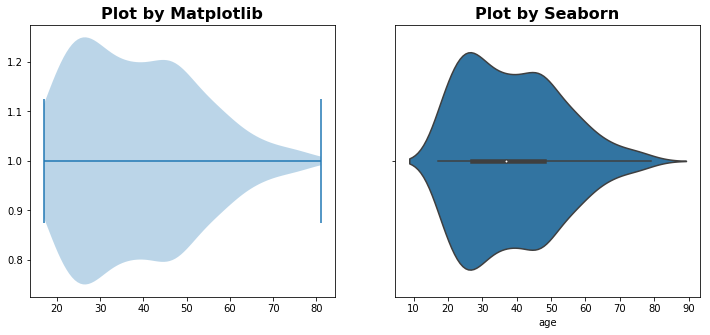

In [0]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))
axes[0].violinplot(df.age,vert=False)
axes[0].set_title('Plot by Matplotlib', fontsize=16,fontweight='bold',color='black')
s=sns.violinplot(df.age,ax=axes[1])
s.set_title("Plot by Seaborn",fontsize=16,fontweight='bold')

### histograms

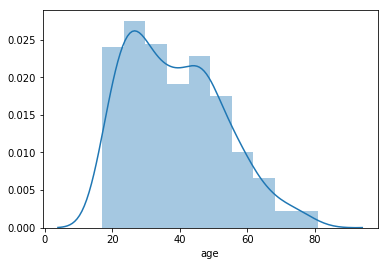

In [0]:
sns.distplot(df.age, bins=10) #Don't worry if there is any warning

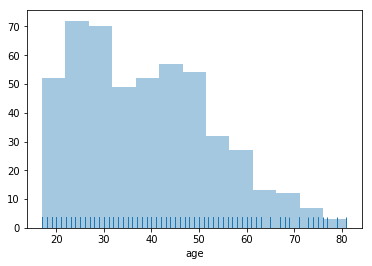

In [0]:
sns.distplot(df.age, kde=False, rug=True)

draw the shape of the distribution without the actual observations/histograms

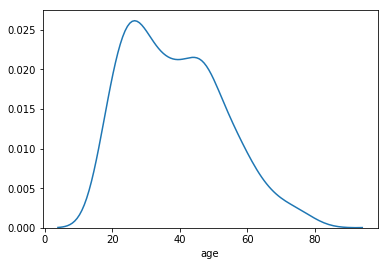

In [0]:
sns.distplot(df.age, hist=False,)

More customizations:

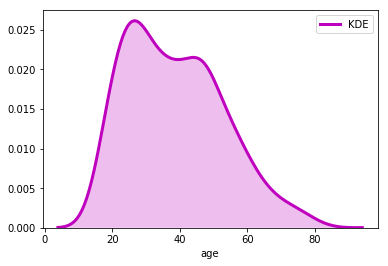

In [0]:
sns.distplot(df.age, hist=False,kde_kws={"color": 'm', "shade": True, 'lw':3,"label": "KDE"},)

Import stats package and then we can also visually evaluate how closely a parametric distribution corresponds to a observed data

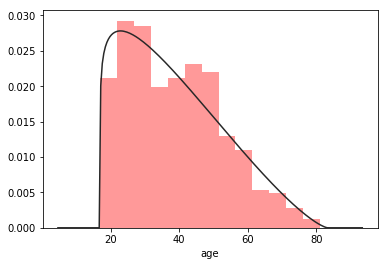

In [0]:
from scipy import stats
sns.distplot(df.age, kde=False, fit=stats.beta, color='red');

### One categorical variable : race

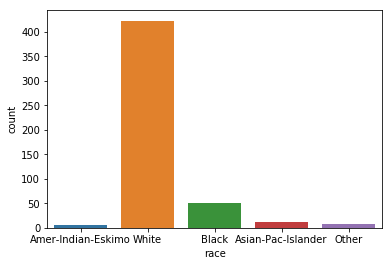

In [0]:
sns.countplot(df['race'])

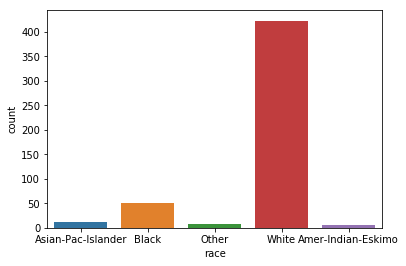

In [0]:
sns.countplot(x=df['race'],order = ['Asian-Pac-Islander', 'Black',  'Other', 'White','Amer-Indian-Eskimo'])

#### Reorder the labels from high to low

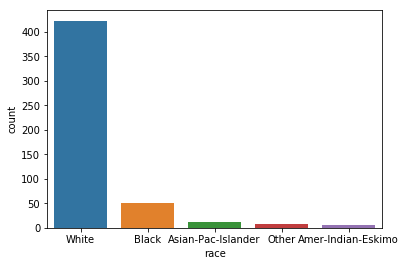

In [0]:
sns.countplot(x=df['race'],order = df['race'].value_counts().index)

#### Reorder the labels in alphabetical order

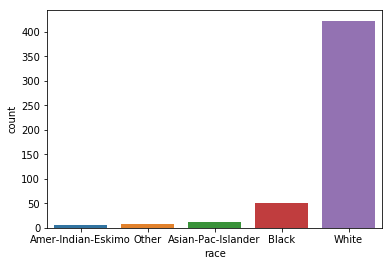

In [0]:
sns.countplot(x=df['race'],order = df['race'].value_counts().sort_values().index)
# order =np.sort(df['race'].unique())

#### We can also plot the bars on y-axe

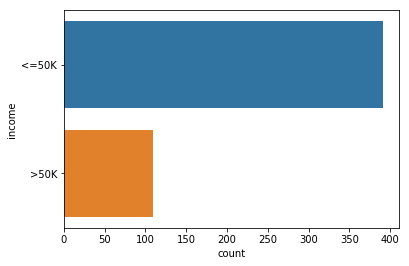

In [0]:
sns.countplot(y='income',data=df)

### One categorical & One numeric variable

_catplot_ shows the relationship between a numerical and one or more categorical variables via several visual representations. Here we'll look at mean age and marital status

<div class="alert alert-block alert-warning">
<b>Example:</b> For each value of "marital status", display the mean age
</div>

In [0]:
df[df['marital.status']=='Divorced'].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,43.535211,214244.943662,10.000000,543.253521,54.197183,40.760563
std,11.008868,130368.061268,2.574601,2116.709938,325.535015,9.519101
min,20.000000,48882.000000,4.000000,0.000000,0.000000,15.000000
25%,36.500000,135010.000000,9.000000,0.000000,0.000000,40.000000
50%,45.000000,188186.000000,9.000000,0.000000,0.000000,40.000000
75%,51.500000,242751.000000,12.500000,0.000000,0.000000,45.000000
max,67.000000,799281.000000,16.000000,14344.000000,2258.000000,70.000000


#### Categorical scatterplots

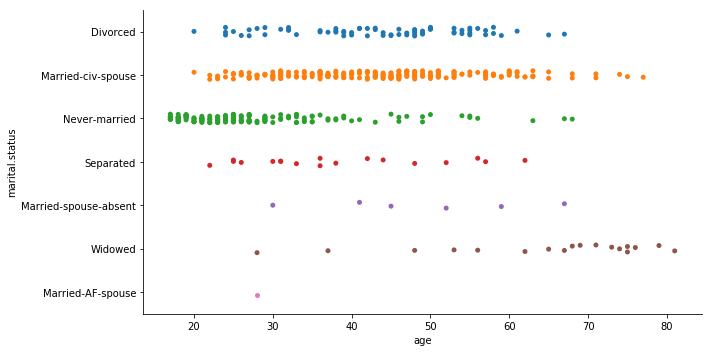

In [0]:
sns.catplot(x='age',y='marital.status', data=df, kind='strip', aspect = 2)

#### Barplots that show the confidence intervals around estimated values of mean age

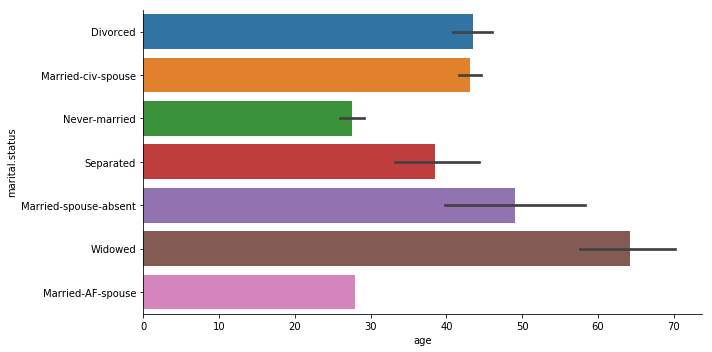

In [0]:
sns.catplot(x='age',y='marital.status', data=df, kind='bar', aspect = 2,capsize=0) #estimator=np.median, 

#### Boxplot

_Box_ shows the 25% ~ 75% quartile of the dataset

_Whiskers_ extends the _box_ by 1.5 _interquartile range_

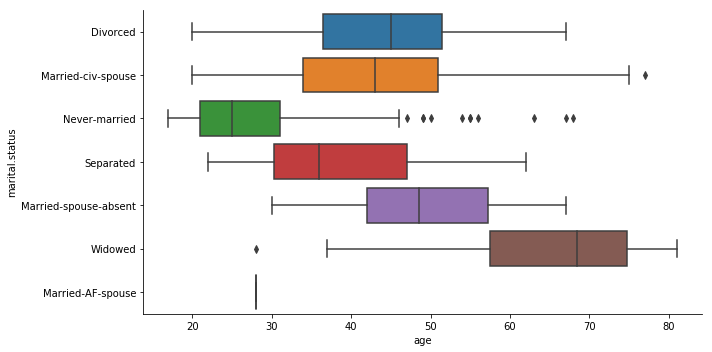

In [0]:
sns.catplot(x='age',y='marital.status', data=df, kind='box', aspect = 2)

### Two numeric variables

#### Scatterplot

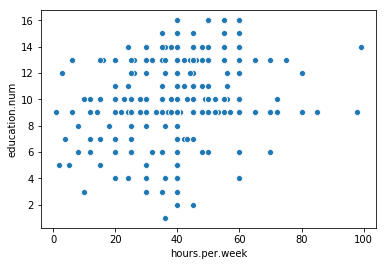

In [0]:
sns.scatterplot(x=df['hours.per.week'], y=df['education.num'])

#### Regression plot

Here the two numeric variables that are not strongly correlated.

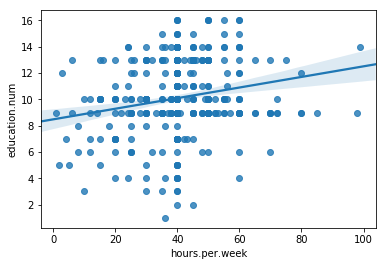

In [0]:
sns.regplot(x=df['hours.per.week'], y=df['education.num'])

#### Pointplot

Estimate central tendency by the position of scatter plot points and provides some indication of the uncertainty around that estimate.

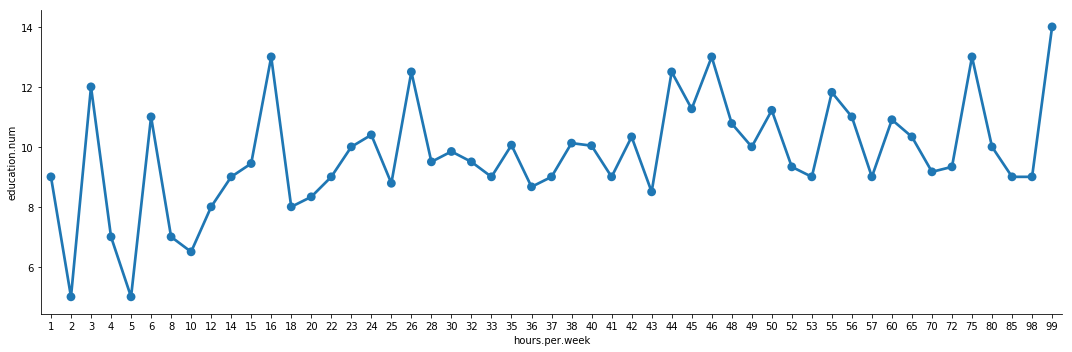

In [0]:
sns.catplot(x='hours.per.week',y='education.num',data=df,kind='point', aspect = 3,ci=0)

### Two categorical variables + One numeric variable

Show the mean age by sex and marital status

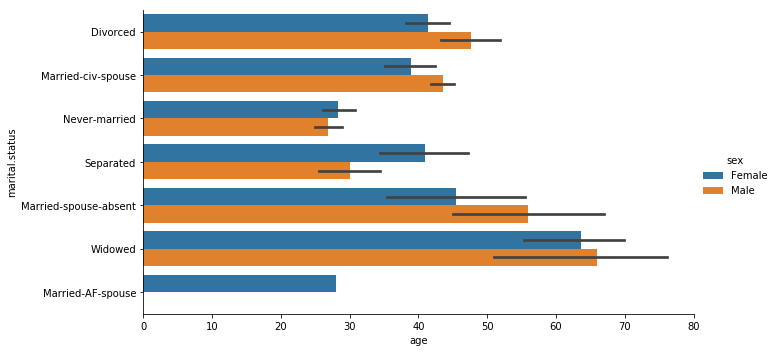

In [0]:
sns.catplot(y='marital.status',x='age', data=df, hue='sex',kind='bar', height=5, aspect = 2)